## Packages to be imported for my model

These packages are loaded below

In [1]:
import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [2]:
#load dataset
(trainX, trainy),(testX, testy)= mnist.load_data()
#summarise data
print("Train X=%s y=%s" %(trainX.shape, trainy.shape))
print("Test X=%s, y=%s" %(testX.shape,testy.shape))

11490434/11490434 [==============================] - 0s 0us/step
Train X=(60000, 28, 28) y=(60000,)
Test X=(10000, 28, 28), y=(10000,)


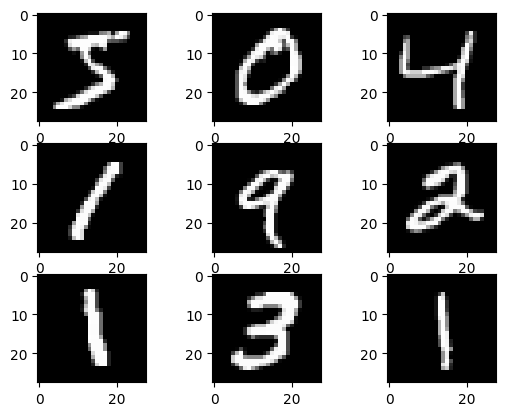

In [3]:
#plot first few images of my dataset
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(trainX[i],cmap = plt.get_cmap("gray"))
plt.show()

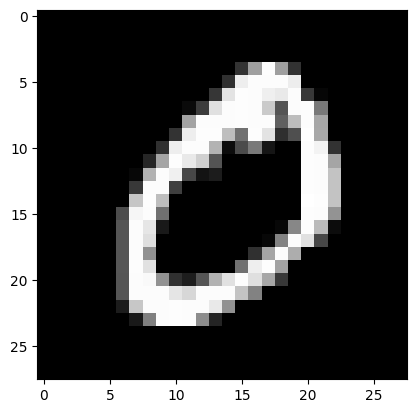

In [4]:
sample = 1
image = trainX[sample]

fig = plt.figure
plt.imshow(image, cmap = "gray")
plt.show()

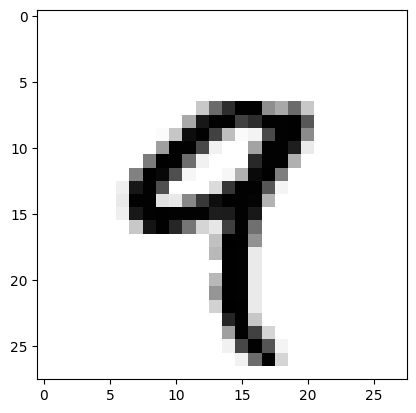

In [5]:
sample = 4
image = trainX[sample]

fig = plt.figure
plt.imshow(image, cmap = "gray_r")
plt.show()

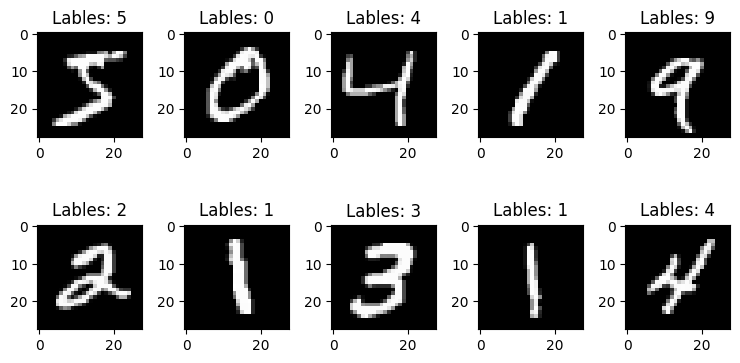

In [6]:
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col,figsize =(1.5*num_col, 2*num_row))
for i in range(10):
  ax = axes[i // num_col, i%num_col]
  ax.imshow(trainX[i],cmap = "gray")
  ax.set_title("Lables: {}".format(trainy[i]))
plt.tight_layout()
plt.show()

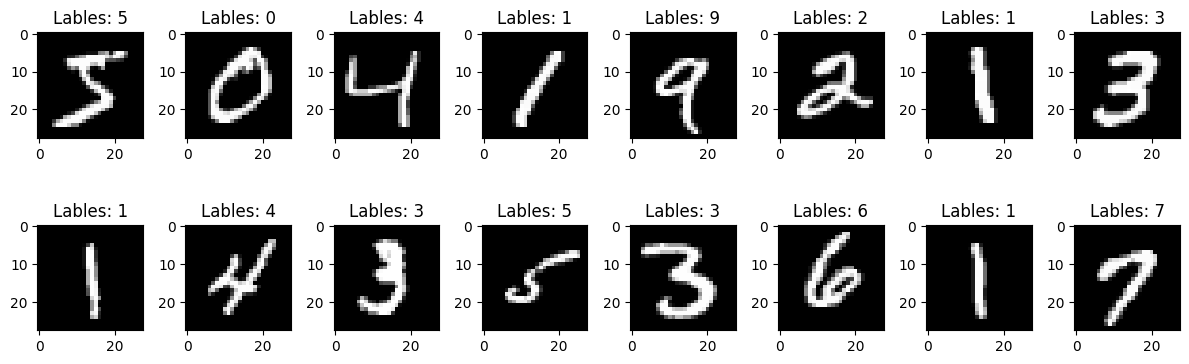

In [7]:
num_row = 2
num_col = 8

fig, axes = plt.subplots(num_row, num_col,figsize =(1.5*num_col, 2*num_row))
for i in range(16):
  ax = axes[i // num_col, i%num_col]
  ax.imshow(trainX[i],cmap = "gray")
  ax.set_title("Lables: {}".format(trainy[i]))
plt.tight_layout()
plt.show()

In [8]:
# reshaping your data to single channel
# pixel shape = 28*28
trainX = trainX.reshape((trainX.shape[0],28,28,1))
testX = testX.reshape((testX.shape[0],28,28,1))

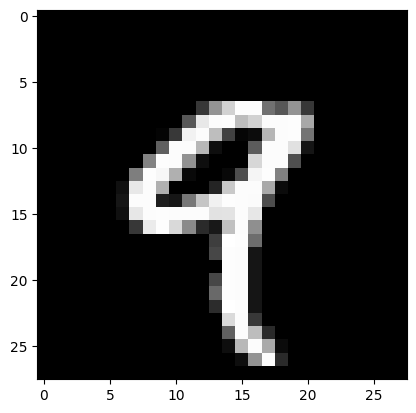

In [9]:
sample = 4
image = trainX[sample]

fig = plt.figure
plt.imshow(image, cmap = "gray")
plt.show()

 ### One = hot encoding

In [10]:
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)

function no. 1

In [11]:
def load_dataset():
  (trainX , trainy),(testX ,testy) =mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainX,trainy, testX,testy

# Normalisation

In [12]:
# integer to float
trainX, trainy, testX,testy = load_dataset()
train_norm = trainX.astype("float32")
test_norm = testX.astype("float32")

In [13]:
# normalize range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

#@ CONVOLUTION NEURAL NETWORK (CNN)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer ='he_uniform', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation ='softmax'))
optimizers = SGD(learning_rate = 0.01, momentum=0.9)
model.compile(optimizer = optimizers, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(trainX,trainy, epochs =10 , batch_size = 32 ,validation_data=(testX,testy))

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 146.2224 - accuracy: 0.1114 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 2.3018 - accuracy: 0.1112 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3020 - accuracy: 0.1117 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 2.3019 - accuracy: 0.1112 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 2.3020 - accuracy: 0.1116 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 2.3020 - accuracy: 0.1115 - val_loss: 2.3014

In [17]:
_,acc=model.evaluate(testX,testy)

313/313 [==============================] - 2s 7ms/step - loss: 2.3013 - accuracy: 0.1135


In [18]:
scores = list()
histories = list()

scores.append(acc)
histories.append(history)

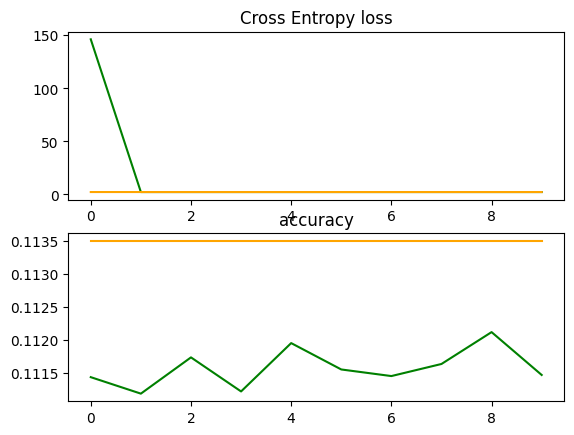

In [19]:
#loss
for i in range(len(histories)):
  plt.subplot(2,1,1)
  plt.title('Cross Entropy loss')
  plt.plot(histories[i].history['loss'],color = 'green',label='train')
  plt.plot(histories[i].history['val_loss'],color = 'orange',label='test')
#accuracy
  plt.subplot(2,1,2)
  plt.title('accuracy')
  plt.plot(histories[i].history['accuracy'],color = 'green',label='train')
  plt.plot(histories[i].history['val_accuracy'],color = 'orange',label='test')
  plt.show()

### whole code in function

### load dataset

In [20]:
def load_dataset():
  (trainX , trainy),(testX ,testy) =mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainX,trainy, testX,testy

### Pixel Scale

In [21]:
def prep_pix(train,test):
  train_norm = trainX.astype("float32")
  test_norm = testX.astype("float32")
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

### CNN model

In [22]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  optimizers = SGD(learning_rate = 0.01, momentum = 0.9)
  model.compile(optimizer = optimizers, loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

k-fold cross validation K = 5


In [23]:
from sklearn.model_selection import KFold

In [24]:
def evaluation(trainX,trainy, n_folds = 5):
   scores = list()
   histories = list()
   kfold = KFold(n_folds,shuffle=True,random_state=1)
   for train_x, test_x in kfold.split(trainX):
      model = define_model()
      trainX,trainY, testX, testY = trainX[train_x], trainy[train_x], trainX[test_x], trainy[test_x]
      history = model.fit(trainX,trainY, epochs=10, batch_size = 64, validation_data=(testX, testY))
      _,acc = model.evaluate(testX,testY)
      scores.append(acc)
      histories.append(history)
      return scores, histories

### Figures

In [25]:
def summarize_diag(histories):
  for i in range(len(histories)):
    plt.subplot(2,1,1)
    plt.title('Cross entropy Loss')
    plt.plot(histories[i].history['loss'], color = 'green', label= 'train')
    plt.plot(histories[i].history['val_loss'], color = 'orange', label= 'test')
    #accuracy
    plt.subplot(2,1,2)
    plt.title('Accuracy')
    plt.plot(histories[i].history['accuracy'], color = 'green', label= 'train')
    plt.plot(histories[i].history['val_accuracy'], color = 'orange', label= 'test')
    plt.show()

### Performance

In [26]:
from numpy import mean ,std

In [30]:
def summarize_perf(scores):
  print("Accuracy: mean =%.3f std=%3f, n=%d" %(mean(scores)*100, std(scores)*100,len(scores)))
  plt.boxplot(scores)
  plt.show()

### check for test

In [31]:
def run_test():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX =  prep_pix(trainX,testX)
  scores, histories = evaluation(trainX, trainY)
  summarize_diag(histories)
  summarize_perf(scores)

Epoch 1/10
750/750 [==============================] - 31s 41ms/step - loss: 0.2221 - accuracy: 0.9330 - val_loss: 0.1218 - val_accuracy: 0.9642
Epoch 2/10
750/750 [==============================] - 31s 41ms/step - loss: 0.0819 - accuracy: 0.9758 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 3/10
750/750 [==============================] - 30s 41ms/step - loss: 0.0524 - accuracy: 0.9845 - val_loss: 0.0633 - val_accuracy: 0.9819
Epoch 4/10
750/750 [==============================] - 29s 39ms/step - loss: 0.0384 - accuracy: 0.9891 - val_loss: 0.0729 - val_accuracy: 0.9770
Epoch 5/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0293 - accuracy: 0.9915 - val_loss: 0.0587 - val_accuracy: 0.9836
Epoch 6/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0231 - accuracy: 0.9932 - val_loss: 0.0530 - val_accuracy: 0.9848
Epoch 7/10
750/750 [==============================] - 30s 40ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0533 - val_accuracy:

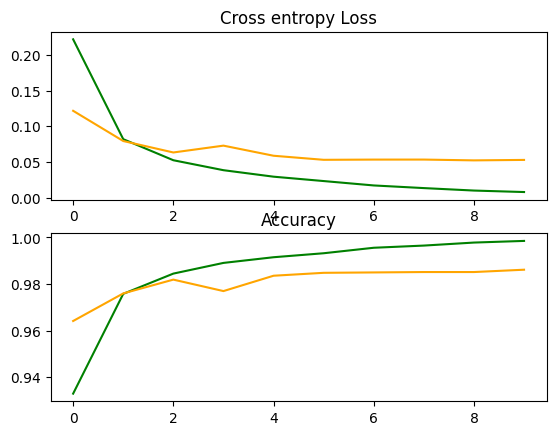

Accuracy: mean =98.617 std=0.000000, n=1


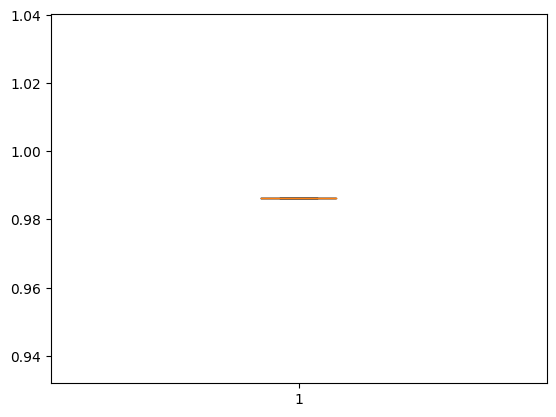

In [32]:
run_test()